<ipython-input-1-f39810ea4fa3>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


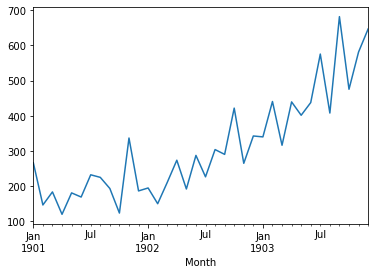

In [1]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages, helps with deprecation

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv' , header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

# summarize first few rows
print(series.head())

# line plot
series.plot()
pyplot.show()

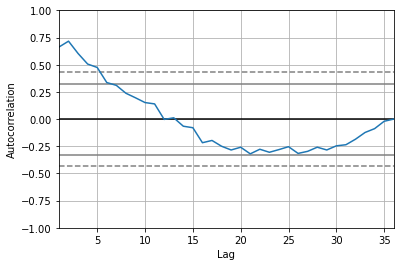

In [2]:
# autocorrelation plot of time series
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages, helps with deprecation

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

## Using the Statsmodels library to create an ARIMA model in Python
The entire Shampoo Sales dataset is fit to an ARIMA model and is reviewed for residual errors. The model is first set to (5,1,0) which sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0. Excess debug information is turned off by setting the disp
argument to 0.

A summary is printed followed by line and density plots. Finally, any residual errors are displayed to see if there is any bias in the data.

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 20 Oct 2020   AIC                            406.340
Time:                        17:54:07   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

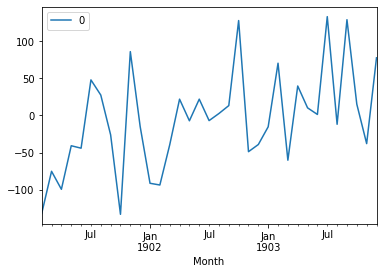

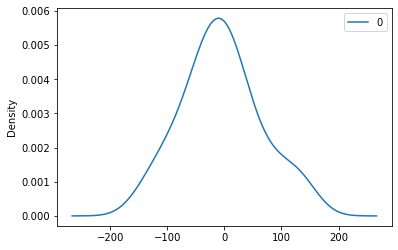

                0
count   35.000000
mean    -5.495175
std     68.132885
min   -133.296583
25%    -42.477890
50%     -7.186503
75%     24.748388
max    133.238008


In [3]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages, helps with deprecation

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind= 'kde' )
pyplot.show()

# summary stats of residuals
print(residuals.describe())

## Rolling Forcast ARIMA Model

predicted=349.117601, expected=342.300000
predicted=306.512956, expected=339.700000
predicted=387.376413, expected=440.400000
predicted=348.154170, expected=315.900000
predicted=386.308786, expected=439.300000
predicted=356.082013, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737277, expected=575.500000
predicted=434.915524, expected=407.600000
predicted=507.923344, expected=682.000000
predicted=435.483017, expected=475.300000
predicted=652.743739, expected=581.300000
predicted=546.343499, expected=646.900000
Test RMSE: 83.417


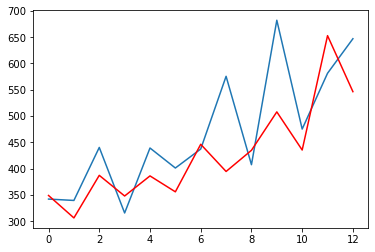

In [4]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages, helps with deprecation

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()